In [1]:
import torch
import torchvision

### If we use a built-in dataset (torchvision.datasets.MNIST) then we can pass the transform argument to the dataset and apply some tranformations like :

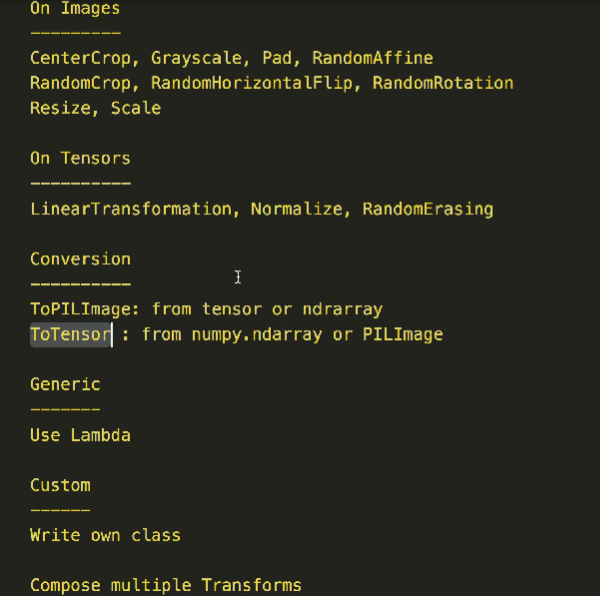
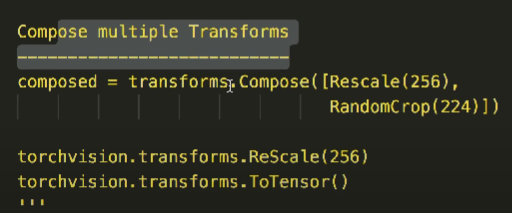

In [ ]:
dataset = torchvision.datasets.MNIST(root = './', transform = torchvision.tranforms.ToTensor())

---

In [3]:
import torch
import torchvision
from torch.utils.data import Dataset
import numpy as np

In [25]:
class WineDataset(Dataset):
    
    def __init__(self, transform=None): # We'll pass a class as an argument...(__call__ inbuilt method)
        # Data loading
        xy = np.loadtxt('wine.csv', delimiter = ",", dtype = np.float32, skiprows = 1)
        
        # Note that we're not converting to tensor here...
        self.x = xy[:, 1:]
        self.y = xy[:, [0]]
        self.n_samples = xy.shape[0]
        
        self.transform = transform
        
    def __getitem__(self, index):
        sample =  self.x[index], self.y[index]
        
        if self.transform:
            sample = self.transform(sample)
            
        return sample
        
    def __len__(self):
        # len(dataset)
        return self.n_samples
    

# The __call__ method enables Python programmers to write classes where the instances behave
# like functions and can be called like a function.

# x(arg1, arg2, ...) is a shorthand for x.__call__(arg1, arg2, ...).


class ToTensor():
    def __call__(self, sample):
        inputs, targets = sample
        return torch.from_numpy(inputs), torch.from_numpy(targets)
    
class MultTranform:
    def __init__(self, factor):        
        self.factor = factor
        
    def __call__(self, sample):
        inputs, targets = sample
        inputs *= self.factor        
        return inputs, targets
    

    
dataset = WineData(transform = ToTensor())

firstdata = dataset[0]

features, labels = firstdata

print(type(features))

print(features)

<class 'torch.Tensor'>
tensor([1.4230e+01, 1.7100e+00, 2.4300e+00, 1.5600e+01, 1.2700e+02, 2.8000e+00,
        3.0600e+00, 2.8000e-01, 2.2900e+00, 5.6400e+00, 1.0400e+00, 3.9200e+00,
        1.0650e+03])


---

### Composed way.....Two or more tranformations...

In [27]:
composed = torchvision.transforms.Compose([ToTensor(), MultTranform(4)])

dataset = WineDataset(transform = composed)

firstdata = dataset[0]

features, labels = firstdata

print(type(features))

print(features)

<class 'torch.Tensor'>
tensor([5.6920e+01, 6.8400e+00, 9.7200e+00, 6.2400e+01, 5.0800e+02, 1.1200e+01,
        1.2240e+01, 1.1200e+00, 9.1600e+00, 2.2560e+01, 4.1600e+00, 1.5680e+01,
        4.2600e+03])


---